# Healthcare Analysis



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import linregress
import numpy as np
import seaborn as sns
import os

#filter warnings
import warnings
warnings.simplefilter("ignore")

# Path files
healthcare_dataset = "../Data/healthcare_dataset.csv"
insurance_dataset = "../Data/insurance.csv"

# Read the data
healthcare_dataset = pd.read_csv(healthcare_dataset)
insurance_dataset = pd.read_csv(insurance_dataset)

# Display the healthcare data table for preview
healthcare_dataset.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Aaron Burnett,54,Female,A-,Obesity,6/3/21,Samantha Mitchell MD,Reynolds LLC,UnitedHealthcare,7531.642746,470,Emergency,6/19/21,Penicillin,Abnormal
1,Aaron Calderon,35,Female,AB+,Diabetes,5/12/23,Christina Johnson,Mata-Vega,Cigna,47555.486730,285,Elective,6/3/23,Paracetamol,Abnormal
2,Aaron Coleman,69,Male,A+,Cancer,9/17/19,Bill Mcdonald,"Petersen, Haynes and Rowe",Cigna,46762.663210,239,Emergency,10/10/19,Lipitor,Abnormal
3,Aaron Daugherty,34,Male,B+,Diabetes,4/9/22,Christopher Jones,"Silva, Thompson and Austin",Aetna,30468.487110,243,Elective,5/8/22,Aspirin,Inconclusive
4,Aaron Davis,22,Female,AB-,Arthritis,6/28/19,Tyler Thomas,Lee-Clark,UnitedHealthcare,17930.743020,351,Urgent,7/13/19,Paracetamol,Abnormal


In [2]:
# Display the insurance data table for preview
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Column healthcare data type info
healthcare_dataset.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [4]:
# Patient count unique
patient_count = healthcare_dataset["Name"].nunique()

# Get a list of unique medical conditions
medical_conditions_list = healthcare_dataset['Medical Condition'].unique()

# Get the count of each medical condition
medical_conditions_count = healthcare_dataset['Medical Condition'].value_counts()

# Display the results
print("Patient Count Unique")
print(patient_count)
      
print("List of Unique Medical Conditions:")
print(medical_conditions_list)

print("Count of Each Medical Condition:")
print(medical_conditions_count)

Patient Count Unique
9378
List of Unique Medical Conditions:
['Obesity' 'Diabetes' 'Cancer' 'Arthritis' 'Asthma' 'Hypertension']
Count of Each Medical Condition:
Medical Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64


In [5]:
#Create Image folder 
out_path = '../Images'


In [6]:
#QUESTION 1.A
#Filter data based on Gender and Billing Amount
gender_billing_data = healthcare_dataset[['Gender', 'Billing Amount']]

# Group the data by 'Gender' and 'Billing Amount', then calculate the mean billing amount by
# Gender, rounded to nearest dollar.
mean_gender_amount = gender_billing_data.groupby('Gender').mean()
mean_gender_amount = mean_gender_amount['Billing Amount'].apply(lambda x: '${:,.0f}'.format(round(x)))
print(mean_gender_amount)

Gender
Female    $25,484
Male      $25,550
Name: Billing Amount, dtype: object


In [7]:
#Filter data based on Gender and Billing Amount grouped by Insurance Provider
insurance_gender_data = healthcare_dataset[['Insurance Provider', 'Gender', 'Billing Amount']]

#Group the data by 'Billing Amount' and 'Gender', then calculate the mean billing amount, rounded to nearest dollar.
mean_insurance_gender = insurance_gender_data.groupby(['Insurance Provider', 'Gender']).mean()
mean_insurance_gender['Billing Amount'] = mean_insurance_gender['Billing Amount'].apply(lambda x: '${:,.0f}'.format(round(x)))

print(mean_insurance_gender)

                          Billing Amount
Insurance Provider Gender               
Aetna              Female        $25,335
                   Male          $26,341
Blue Cross         Female        $26,178
                   Male          $25,158
Cigna              Female        $25,724
                   Male          $25,588
Medicare           Female        $25,008
                   Male          $24,996
UnitedHealthcare   Female        $25,200
                   Male          $25,617


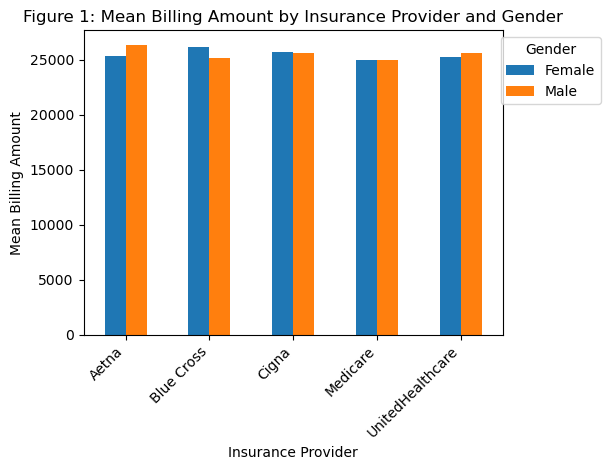

In [8]:
#Undo $ for billing amount to chart
mean_insurance_gender['Billing Amount'] = mean_insurance_gender['Billing Amount'].replace('[\$,]', '', regex=True).astype(float)

#Create barchart for comparison of Insurance Providers Billing Amount by Gender 
mean_insurance_gender['Billing Amount'].unstack().plot(kind='bar')

# Add labels and title
plt.xlabel('Insurance Provider')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mean Billing Amount')
plt.title('Figure 1: Mean Billing Amount by Insurance Provider and Gender')
plt.legend(title='Gender', bbox_to_anchor=(1.25, 1), loc='best')
plt.tight_layout()

#Save image as PNG
plt.savefig(os.path.join(out_path, "Mean_Billing_Amount_by_Insurance_Provider_and_Gender.png"))


In [9]:
#QUESTION 2.A
# Group by Medical Condition and Insurance Provider, and calculate mean, min, and max
billing_stats = healthcare_dataset.groupby(['Medical Condition', 'Insurance Provider'])['Billing Amount'].agg(['mean', 'min', 'max']).reset_index()

# Rename columns for clarity
billing_stats.columns = ['Medical Condition', 'Insurance Provider', 'Mean Billing', 'Min Billing', 'Max Billing']

# Display the results
billing_stats

,Medical Condition,Insurance Provider,Mean Billing,Min Billing,Max Billing
0,Arthritis,Aetna,24694.858132,1009.417327,49745.81198
1,Arthritis,Blue Cross,25989.515740,1271.433037,49838.14629
2,Arthritis,Cigna,25189.873894,1256.479072,49936.07375
3,Arthritis,Medicare,24206.381013,1042.981212,49985.97307
4,Arthritis,UnitedHealthcare,25704.428629,1308.848408,49573.39990
5,Asthma,Aetna,24761.515983,1032.263087,49974.29914
6,Asthma,Blue Cross,25701.560294,1104.544422,49910.07762
7,Asthma,Cigna,26604.203083,1227.603915,49874.35205
8,Asthma,Medicare,25820.568227,1057.017333,49891.40239
9,Asthma,UnitedHealthcare,24198.125815,1118.831126,49401.13273


In [10]:
# Convert the check in and check out columns to datetime
new_metadata = healthcare_dataset
new_metadata["Date of Admission"] = pd.to_datetime(new_metadata["Date of Admission"])
new_metadata["Discharge Date"] = pd.to_datetime(new_metadata["Discharge Date"])

# Add a column to the dataset that tells us how long the patient was in the hospital for
new_metadata["Length of Stay (days)"] = (new_metadata["Discharge Date"] - new_metadata["Date of Admission"]).dt.days
new_metadata

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay (days)
0,Aaron Burnett,54,Female,A-,Obesity,2021-06-03,Samantha Mitchell MD,Reynolds LLC,UnitedHealthcare,7531.642746,470,Emergency,2021-06-19,Penicillin,Abnormal,16
1,Aaron Calderon,35,Female,AB+,Diabetes,2023-05-12,Christina Johnson,Mata-Vega,Cigna,47555.486730,285,Elective,2023-06-03,Paracetamol,Abnormal,22
2,Aaron Coleman,69,Male,A+,Cancer,2019-09-17,Bill Mcdonald,"Petersen, Haynes and Rowe",Cigna,46762.663210,239,Emergency,2019-10-10,Lipitor,Abnormal,23
3,Aaron Daugherty,34,Male,B+,Diabetes,2022-04-09,Christopher Jones,"Silva, Thompson and Austin",Aetna,30468.487110,243,Elective,2022-05-08,Aspirin,Inconclusive,29
4,Aaron Davis,22,Female,AB-,Arthritis,2019-06-28,Tyler Thomas,Lee-Clark,UnitedHealthcare,17930.743020,351,Urgent,2019-07-13,Paracetamol,Abnormal,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Zachary Wood,36,Male,O-,Arthritis,2021-06-23,Jessica Smith,Wright-Welch,Aetna,7154.956700,432,Emergency,2021-07-03,Paracetamol,Inconclusive,10
9996,Zachary Yates,37,Male,A-,Diabetes,2023-08-21,Kenneth Owens,Foster and Sons,Cigna,5937.256092,228,Elective,2023-08-27,Lipitor,Abnormal,6
9997,Zoe Adkins DVM,30,Female,A+,Diabetes,2021-08-10,Brittney Butler,"Sutton, Bowen and Thompson",Blue Cross,13133.514330,127,Urgent,2021-08-29,Paracetamol,Normal,19
9998,Zoe Henderson,67,Female,AB+,Diabetes,2020-05-30,Dylan Robbins,Moore-Mendez,Cigna,48451.386360,321,Elective,2020-06-26,Ibuprofen,Normal,27


In [11]:
# Wanted to look at the length of stay per Medical Condition to see if there were any trends
length_per_condition = new_metadata.groupby('Medical Condition')['Length of Stay (days)'].mean()
length_per_condition

Medical Condition
Arthritis       15.990303
Asthma          15.481265
Cancer          15.479742
Diabetes        15.574245
Hypertension    15.430095
Obesity         15.421990
Name: Length of Stay (days), dtype: float64

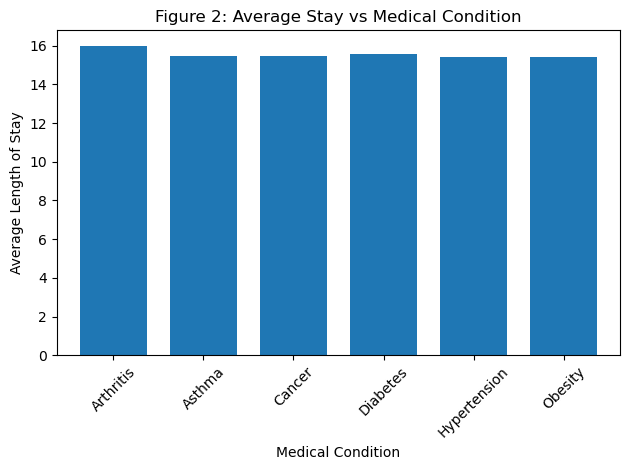

In [12]:
# Convert the results to a bar chart
#plt.tight_layout()
length_per_condition.plot(kind="bar", width=.75)
plt.xticks(rotation=45, ha='center')
plt.xlabel("Medical Condition")
plt.ylabel("Average Length of Stay")
plt.title("Figure 2: Average Stay vs Medical Condition")
plt.tight_layout()
#save image as PNG
plt.savefig(os.path.join(out_path, "Average_Stay_vs_Medical_Condition.png"))

In [13]:
#QUESTION 3.A
# Wanted to look at the length of stay per age to see if we could predict how long people will stay based on their age
# Start by creating bins for ages since there can be a large variety
age_bins = [18, 30, 45, 60, 75, 90]
labels = ["18-30", "30-45", "45-60", "60-75", "75-90"]
# Create by bins and add them to the dataframe
new_metadata["Age Range"] = pd.cut(new_metadata["Age"], age_bins, labels=labels)
new_metadata

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay (days),Age Range
0,Aaron Burnett,54,Female,A-,Obesity,2021-06-03,Samantha Mitchell MD,Reynolds LLC,UnitedHealthcare,7531.642746,470,Emergency,2021-06-19,Penicillin,Abnormal,16,45-60
1,Aaron Calderon,35,Female,AB+,Diabetes,2023-05-12,Christina Johnson,Mata-Vega,Cigna,47555.486730,285,Elective,2023-06-03,Paracetamol,Abnormal,22,30-45
2,Aaron Coleman,69,Male,A+,Cancer,2019-09-17,Bill Mcdonald,"Petersen, Haynes and Rowe",Cigna,46762.663210,239,Emergency,2019-10-10,Lipitor,Abnormal,23,60-75
3,Aaron Daugherty,34,Male,B+,Diabetes,2022-04-09,Christopher Jones,"Silva, Thompson and Austin",Aetna,30468.487110,243,Elective,2022-05-08,Aspirin,Inconclusive,29,30-45
4,Aaron Davis,22,Female,AB-,Arthritis,2019-06-28,Tyler Thomas,Lee-Clark,UnitedHealthcare,17930.743020,351,Urgent,2019-07-13,Paracetamol,Abnormal,15,18-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Zachary Wood,36,Male,O-,Arthritis,2021-06-23,Jessica Smith,Wright-Welch,Aetna,7154.956700,432,Emergency,2021-07-03,Paracetamol,Inconclusive,10,30-45
9996,Zachary Yates,37,Male,A-,Diabetes,2023-08-21,Kenneth Owens,Foster and Sons,Cigna,5937.256092,228,Elective,2023-08-27,Lipitor,Abnormal,6,30-45
9997,Zoe Adkins DVM,30,Female,A+,Diabetes,2021-08-10,Brittney Butler,"Sutton, Bowen and Thompson",Blue Cross,13133.514330,127,Urgent,2021-08-29,Paracetamol,Normal,19,18-30
9998,Zoe Henderson,67,Female,AB+,Diabetes,2020-05-30,Dylan Robbins,Moore-Mendez,Cigna,48451.386360,321,Elective,2020-06-26,Ibuprofen,Normal,27,60-75


In [40]:
# Perform a quick analysis of the age groups to see which age ranges had the most and least records
age_stats = new_metadata["Age Range"].value_counts()
age_stats

Age Range
45-60    2225
60-75    2215
30-45    2211
18-30    1739
75-90    1446
Name: count, dtype: int64

In [15]:
# Group the data by age range and calculate the average stay per age range
age_stay = new_metadata.groupby("Age Range")["Length of Stay (days)"].mean()
age_stay

Age Range
18-30    15.503163
30-45    15.410222
45-60    15.621573
60-75    15.563883
75-90    15.744813
Name: Length of Stay (days), dtype: float64

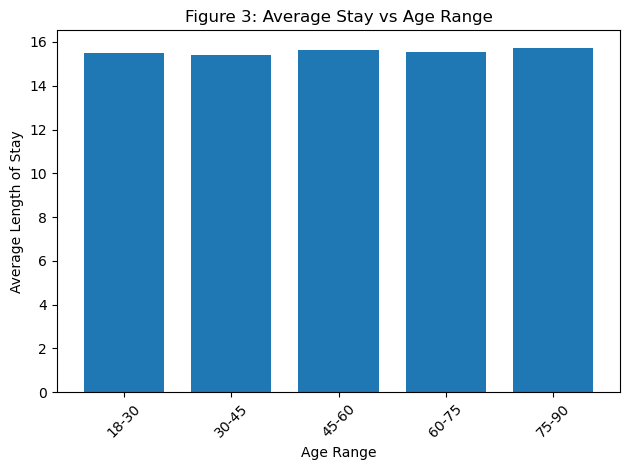

In [16]:
# Chart a bar graph to see the results
age_stay.plot(kind="bar", width=.75)
plt.xticks(rotation=45, ha='center')
plt.xlabel("Age Range")
plt.ylabel("Average Length of Stay")
plt.title("Figure 3: Average Stay vs Age Range")
plt.tight_layout()

#Save Image as PNG
plt.savefig(os.path.join(out_path, "Average_Stay_vs_Age_Range.png"))

In [17]:
#QUESTION 3.B
# Wanted to look at the count of medical conditions per age range
age_condition = new_metadata.groupby("Age Range")["Medical Condition"].value_counts()

age_condition = pd.DataFrame(age_condition)
age_condition

count
Age Range Medical Condition       
18-30     Hypertension         311
          Asthma               296
          Obesity              292
          Cancer               289
          Diabetes             279
          Arthritis            272
30-45     Hypertension         389
          Asthma               380
          Cancer               380
          Arthritis            369
          Obesity              347
          Diabetes             346
45-60     Cancer               392
          Arthritis            382
          Asthma               378
          Obesity              368
          Diabetes             365
          Hypertension         340
60-75     Asthma               384
          Hypertension         378
          Diabetes             370
          Arthritis            370
          Obesity              360
          Cancer               353
75-90     Cancer               261
          Asthma               243
          Diabetes             238
          Obesity              238
          Hypertension         237
          Arthritis            229

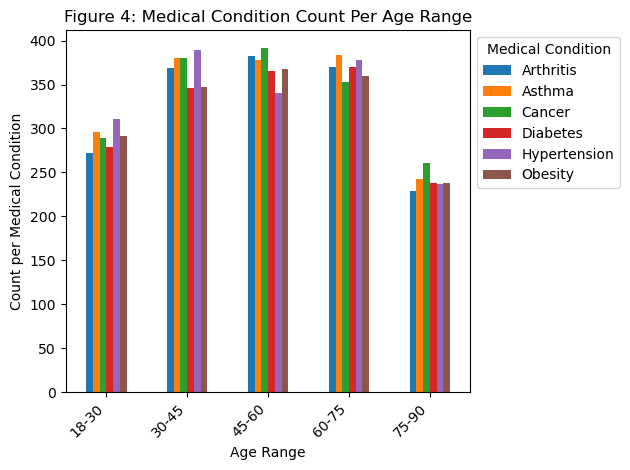

In [18]:
#Create barchart to compare the total of each medical condition per age group
age_condition['count'].unstack().plot(kind='bar')

# Add labels and title
plt.xlabel('Age Range')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count per Medical Condition')
plt.title('Figure 4: Medical Condition Count Per Age Range')
plt.legend(title='Medical Condition', bbox_to_anchor=(1, 1), loc='best')
#plt.figure(figsize=(10, 6))
plt.tight_layout()
#Save image as PNG
plt.savefig(os.path.join(out_path, "Medical_Condition_Per_Age_Range.png"))


In [19]:
#QUESTION 3.C
# Wanted to look at the different types of medication used per age range
age_medication = new_metadata.groupby("Age Range")["Medication"].value_counts()

age_medication = pd.DataFrame(age_medication)
age_medication

count
Age Range Medication        
18-30     Ibuprofen      368
          Lipitor        358
          Aspirin        352
          Penicillin     332
          Paracetamol    329
30-45     Penicillin     485
          Aspirin        443
          Paracetamol    432
          Lipitor        431
          Ibuprofen      420
45-60     Penicillin     467
          Paracetamol    460
          Lipitor        444
          Ibuprofen      437
          Aspirin        417
60-75     Lipitor        470
          Penicillin     454
          Ibuprofen      442
          Aspirin        441
          Paracetamol    408
75-90     Penicillin     307
          Paracetamol    303
          Aspirin        280
          Ibuprofen      280
          Lipitor        276

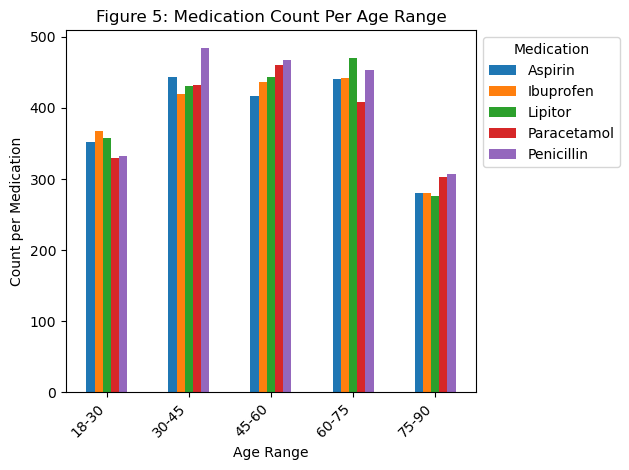

In [20]:
#Create barchart to compare the total of each medication used per age group
age_medication['count'].unstack().plot(kind='bar')

# Add labels and title
plt.xlabel('Age Range')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count per Medication')
plt.title('Figure 5: Medication Count Per Age Range')
plt.legend(title='Medication', bbox_to_anchor=(1, 1), loc='best')
plt.tight_layout()
#Save image as PNG
plt.savefig(os.path.join(out_path, "Medication_Count_Per_Age_Range.png"))


The r-value is: 0.009111433218769093


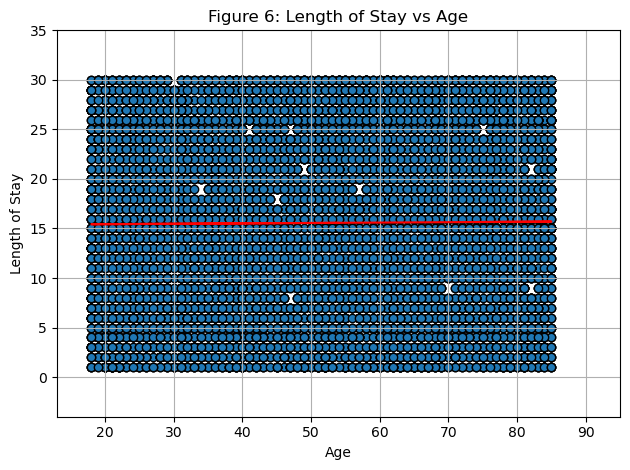

In [21]:
#QUESTION 3.D
# Next we wanted to look at the relationship between length of stay at the hospital and the age to see if there were any trends
# Linear regression was added so we could see the relationship between the length of stay and age
x_values = new_metadata["Age"]
y_values = new_metadata["Length of Stay (days)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# First created a scatter plot to show the results from the DataFrame using my desired columns
plt.scatter(x_values,y_values, marker="o", edgecolor="black")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,-25),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Figure 6: Length of Stay vs Age")
plt.ylabel("Length of Stay")
plt.xlabel("Age")
plt.grid(True)

plt.xlim(min(new_metadata["Age"]) - 5, max(new_metadata["Age"]) + 10)
plt.ylim(min(new_metadata["Length of Stay (days)"]) - 5, max(new_metadata["Length of Stay (days)"]) + 5)

print(f"The r-value is: {rvalue}")

plt.tight_layout()

#Save image as PNG
plt.savefig(os.path.join(out_path, "Length_of_Stay_vs_Age.png"))


The r-value is: -0.013506705939415631


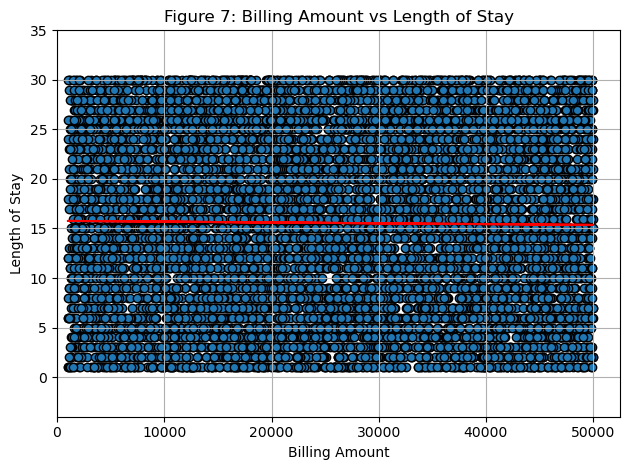

In [22]:
# We wanted to look at the relationship between length of stay and bill amount
# Plotted the linear regression so that we could see what the correlation was
x_values = new_metadata["Billing Amount"]
y_values = new_metadata["Length of Stay (days)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# We first created a scatter plot to show the results from the DataFrame using my desired columns
plt.scatter(x_values,y_values, marker="o", edgecolor="black")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,-25),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Figure 7: Billing Amount vs Length of Stay")
plt.ylabel("Length of Stay")
plt.xlabel("Billing Amount")
plt.grid(True)

plt.xlim(0, max(new_metadata["Billing Amount"]) * 1.05)
plt.ylim(min(new_metadata["Length of Stay (days)"]) - 5, max(new_metadata["Length of Stay (days)"]) + 5)

print(f"The r-value is: {rvalue}")

plt.tight_layout()

#Save image as PNG
plt.savefig(os.path.join(out_path, "Billing_Amount_vs_Length_of_Stay.png"))


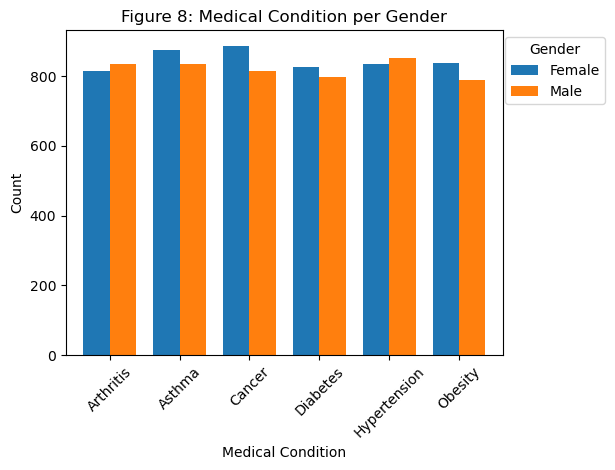

In [23]:
#QUESTION 1.B
# Filter the dataset for the specific medical condition and gender 'Female'
# Wanted to look at the relationship between medical condition and gender
gender_medical = new_metadata.groupby(["Medical Condition", "Gender"])["Gender"].count()
gender_medical.unstack().plot(kind="bar", width=.75, rot=45)
plt.xlabel("Medical Condition")
plt.ylabel("Count")
plt.title("Figure 8: Medical Condition per Gender")
plt.legend(title='Gender', bbox_to_anchor=(1.25, 1), loc='upper right')

plt.tight_layout()

#Save image as PNG
plt.savefig(os.path.join(out_path, "Medical_Condition_Gender.png"))


In [24]:
insurance=insurance_dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [26]:
# Wanted to look at the average charges per region
region_average = insurance.groupby("region")["charges"].mean()
region_average

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

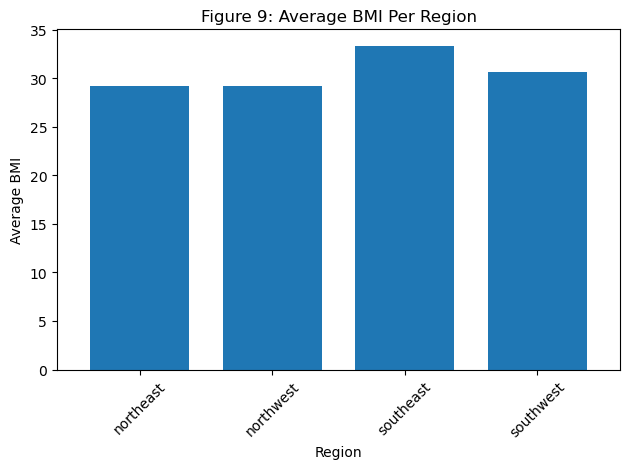

In [27]:
#Question 2.B
# Wanted to further explore why the southeast region would have the highest average charge
region_bmi = insurance.groupby("region")["bmi"].mean()
region_bmi.plot(kind="bar", width=.75)
plt.xticks(rotation=45, ha='center')
plt.xlabel("Region")
plt.ylabel("Average BMI")
plt.title("Figure 9: Average BMI Per Region")

plt.tight_layout()

#Save image as PNG
#plt.savefig(os.path.join(out_path, "Average_Charges_Per_Region.png"))
#As you can see the southeast region has the highest average BMI. This is also interesting as it could explain why
#the southeast region has the highest average charge
plt.tight_layout()

#Save image as PNG
plt.savefig(os.path.join(out_path, "Average_BMI_per_Region.png"))

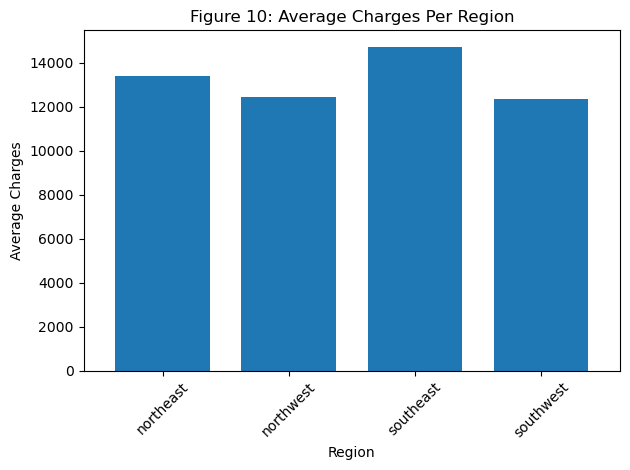

In [28]:
# Plotted out the results 
region_average.plot(kind="bar", width=.75)
plt.xticks(rotation=45, ha='center')
plt.xlabel("Region")
plt.ylabel("Average Charges")
plt.title("Figure 10: Average Charges Per Region")

plt.tight_layout()

#Save image as PNG
plt.savefig(os.path.join(out_path, "Average_Charges_Per_Region.png"))
#As you can see the region with the highest average costs is the southeast region

In [29]:
#QUESTION 4.A
# Wanted to plot out the average charges for smokers vs non-smokers
smoker_average = insurance.groupby("smoker")["charges"].mean()
smoker_average

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

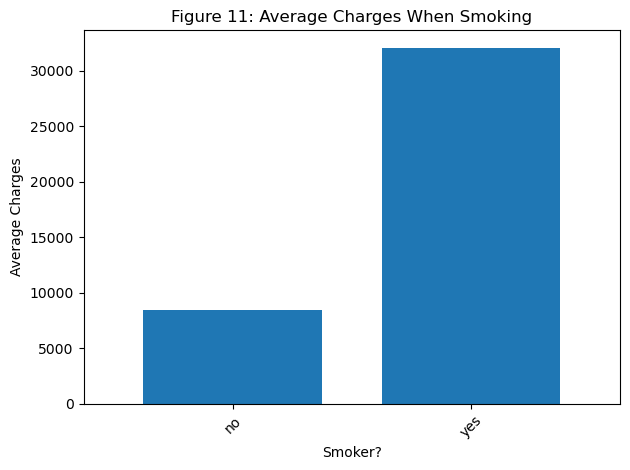

In [30]:
# Plotted out the results 
smoker_average.plot(kind="bar", width=.75)
plt.xticks(rotation=45, ha='center')
plt.xlabel("Smoker?")
plt.ylabel("Average Charges")
plt.title("Figure 11: Average Charges When Smoking")

plt.tight_layout()

#Save image as PNG
plt.savefig(os.path.join(out_path, "Mean_Charges_Smoker_vs_Non-Smoker.png"))


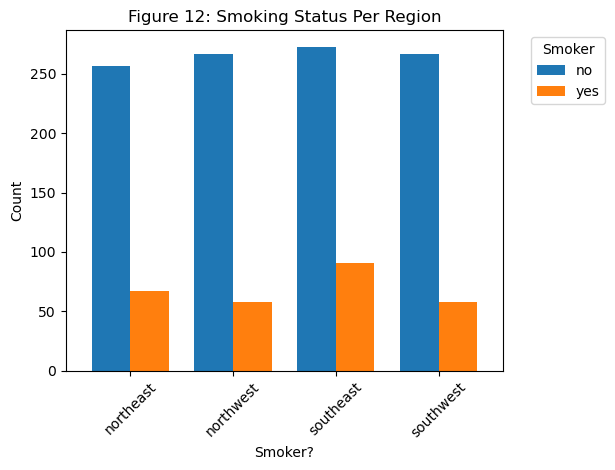

In [31]:
#QUESTION 4.B
# Wanted to take a deeper look at what could be contributing to the southeast region having the highest average cost
region_smokers = insurance.groupby("region")["smoker"].value_counts()
region_smokers.unstack().plot(kind="bar", width=.75, rot=45)
plt.xlabel("Smoker?")
plt.ylabel("Count")
plt.title("Figure 12: Smoking Status Per Region")
plt.legend(title='Smoker', bbox_to_anchor=(1.25, 1), loc='upper right')

plt.tight_layout()

#Save image as PNG
plt.savefig(os.path.join(out_path, "Smoking_Status_Per_Region.png"))
# As you can see in the graph the region with the highest number of smokers is the southeast region which could 
#Contribute to it having the highest average cost

In [32]:
# Wanted to look at the charge averages per gender
gender_average = insurance.groupby("sex")["charges"].mean()
gender_average

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

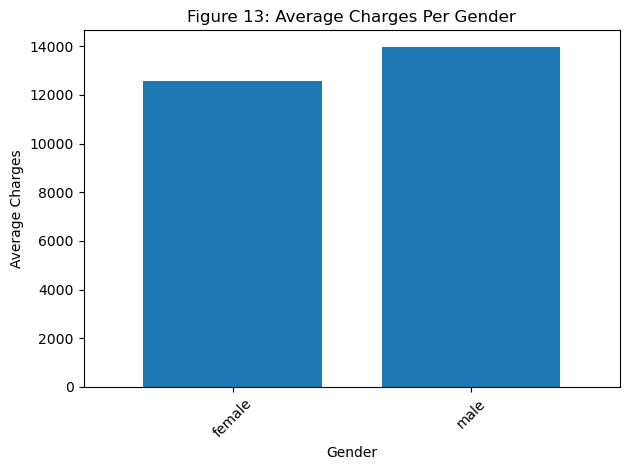

In [33]:
#QUESTION 1.C
# Plotted out the results of average charge per gender
gender_average.plot(kind="bar", width=.75)
plt.xticks(rotation=45, ha='center')
plt.xlabel("Gender")
plt.ylabel("Average Charges")
plt.title("Figure 13: Average Charges Per Gender")

plt.tight_layout()

#Save image as PNG
plt.savefig(os.path.join(out_path, "Average_Charges_Per_Gender.png"))

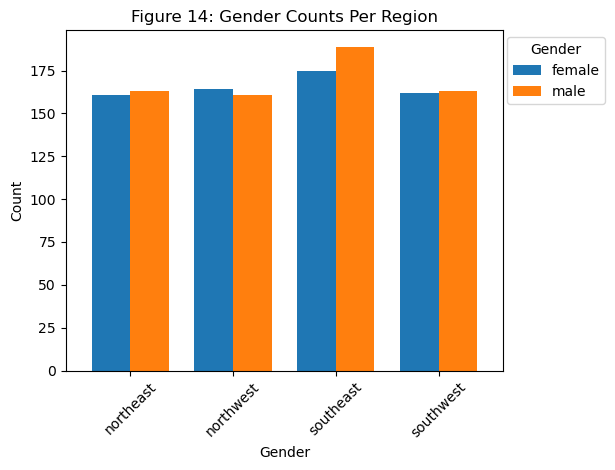

In [34]:
#QUESTION 1.D
# Wanted to take a deeper look at what could be contributing to the southeast region having the highest average cost
region_gender = insurance.groupby("region")["sex"].value_counts()
region_gender.unstack().plot(kind="bar", width=.75, rot=45)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Figure 14: Gender Counts Per Region")
plt.legend(title='Gender', bbox_to_anchor=(1.25, 1), loc='upper right')

plt.tight_layout()
# As you can see in the graph the number of males is higher in the southeast region than any other which could 
#be contributing to the the southeast region having the highest average cost
#Save image as PNG
plt.savefig(os.path.join(out_path, "Gender_Counts_per_Region.png"))

In [35]:
#QUESTION 4. 2 sample T-Test

#population1 mean for charges for "Smoker"
population1 = insurance[insurance["smoker"] == "yes"]
population1.charges.mean()


32050.23183153284

In [36]:
#population2 mean for charges for "Non-Smoker"
population2 = insurance[insurance["smoker"] == "no"]
population2.charges.mean()


8434.268297856204

In [37]:
#Calculate independent 2-sample Ttest Results smoker vs non-smoker
stats.ttest_ind(population1.charges, population2.charges, equal_var=False)

TtestResult(statistic=32.751887766341824, pvalue=5.88946444671698e-103, df=311.85112492054634)

The r-value is: 0.29900819333064776


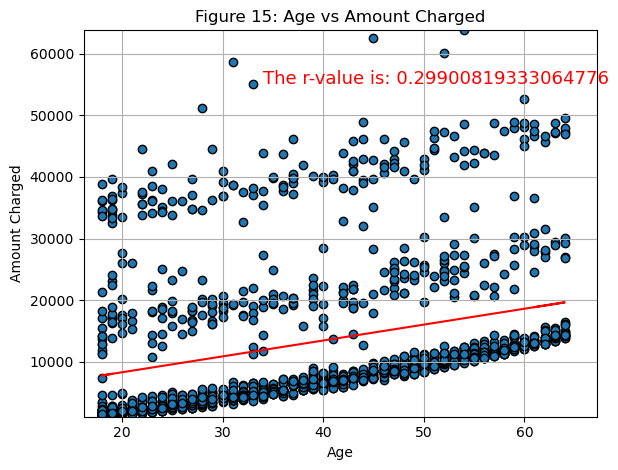

In [38]:
#QUESTION 3.E
# Wanted to plot out the differences between age and charges to see if there is any correlation between the 2
x_values = insurance["age"]
y_values = insurance["charges"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# I first created a scatter plot to show the results from the DataFrame using my desired columns
plt.scatter(x_values,y_values, marker="o", edgecolor="black")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,-25),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Figure 15: Age vs Amount Charged")
plt.ylabel("Amount Charged")
plt.xlabel("Age")
plt.grid(True)

plt.xlim(min(insurance["age"]) * .9, max(insurance["age"]) * 1.05)
plt.ylim(min(insurance["charges"]) - 5, max(insurance["charges"]) + 5)

plt.annotate(f"The r-value is: {rvalue}",(34,55000),fontsize=13,color="red")
print(f"The r-value is: {rvalue}")
plt.tight_layout()

#Save image as PNG
plt.savefig(os.path.join(out_path, "Age_vs_Amount_Charged.png"))


The r-value is: 0.1983409688336289


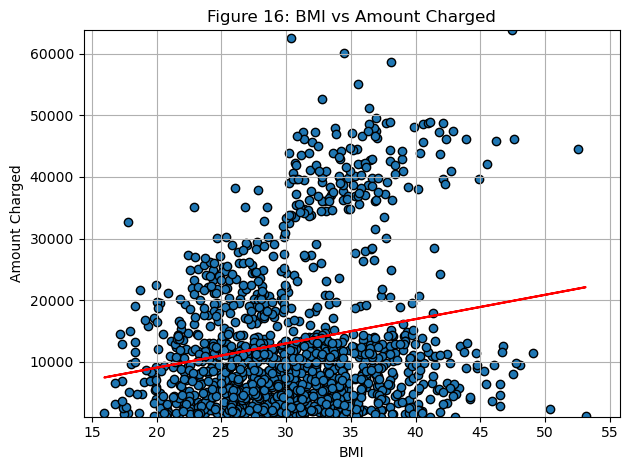

In [39]:
x_values = insurance["bmi"]
y_values = insurance["charges"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# I first created a scatter plot to show the results from the DataFrame using my desired columns
plt.scatter(x_values,y_values, marker="o", edgecolor="black")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,-25),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Figure 16: BMI vs Amount Charged")
plt.ylabel("Amount Charged")
plt.xlabel("BMI")
plt.grid(True)

plt.xlim(min(insurance["bmi"]) * .9, max(insurance["bmi"]) * 1.05)
plt.ylim(min(insurance["charges"]) - 5, max(insurance["charges"]) + 5)

print(f"The r-value is: {rvalue}")

plt.tight_layout()

#Save image as PNG
plt.savefig(os.path.join(out_path, "BMI_vs_Amount_Charged.png"))
